In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [3]:
file_path = 'stead_earthquake.csv'  
data = pd.read_csv(file_path,low_memory=False)


In [8]:
file_path = 'stead_earthquake.csv'  
df = pd.read_csv(file_path,low_memory=False)

In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the columns with the number of missing values
print(missing_values)


network_code                             55
receiver_code                             0
receiver_type                             0
receiver_latitude                         0
receiver_longitude                        0
receiver_elevation_m                      0
p_arrival_sample                          0
p_status                                  0
p_weight                                175
p_travel_sec                            226
s_arrival_sample                          0
s_status                                  0
s_weight                                155
source_id                                 0
source_origin_time                        0
source_origin_uncertainty_sec        901126
source_latitude                           0
source_longitude                          0
source_error_sec                     578306
source_gap_deg                       659237
source_horizontal_uncertainty_km     599869
source_depth_km                          51
source_depth_uncertainty_km     

In [4]:
print("Dataset Information:")
data.info()
print("\nSample Data:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058954 entries, 0 to 1058953
Data columns (total 35 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   network_code                      1058899 non-null  object 
 1   receiver_code                     1058954 non-null  object 
 2   receiver_type                     1058954 non-null  object 
 3   receiver_latitude                 1058954 non-null  float64
 4   receiver_longitude                1058954 non-null  float64
 5   receiver_elevation_m              1058954 non-null  float64
 6   p_arrival_sample                  1058954 non-null  float64
 7   p_status                          1058954 non-null  object 
 8   p_weight                          1058779 non-null  float64
 9   p_travel_sec                      1058728 non-null  float64
 10  s_arrival_sample                  1058954 non-null  float64
 11  s_status        

In [5]:
# Dropping columns with too many missing values (threshold can be adjusted as needed)
threshold = 0.4  # If more than 40% of values are missing, drop the column
data = data.dropna(thresh=int(threshold * len(data)), axis=1)



In [6]:
# For remaining missing values, fill with median or mode (numeric and categorical respectively)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])  # Fill categorical with mode
    else:
        data[column] = data[column].fillna(data[column].median())  # Fill numerical with median


In [7]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the columns with the number of missing values
print(missing_values)


network_code                        0
receiver_code                       0
receiver_type                       0
receiver_latitude                   0
receiver_longitude                  0
receiver_elevation_m                0
p_arrival_sample                    0
p_status                            0
p_weight                            0
p_travel_sec                        0
s_arrival_sample                    0
s_status                            0
s_weight                            0
source_id                           0
source_origin_time                  0
source_latitude                     0
source_longitude                    0
source_error_sec                    0
source_horizontal_uncertainty_km    0
source_depth_km                     0
source_magnitude                    0
source_magnitude_type               0
source_distance_deg                 0
source_distance_km                  0
back_azimuth_deg                    0
snr_db                              0
coda_end_sam

In [10]:
# Step 4: Drop Irrelevant Columns
columns_to_drop = [
    'network_code', 'receiver_code', 'receiver_type', 'trace_name'
]
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [12]:
# Step 4: Drop Irrelevant Columns
columns_to_drop = [
   'source_magnitude_type'
]
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

In [11]:
# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['p_status', 's_status', 'source_id', 'source_origin_time',
       'source_magnitude_type', 'snr_db', 'trace_start_time',
       'trace_category'],
      dtype='object')


In [15]:
pip install matplotlib seaborn folium geopandas


     -------------------------------------- 108.4/108.4 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 323.6/323.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 133.3/133.3 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully unin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


ValueError: num must be 1 <= num <= 20, not 21

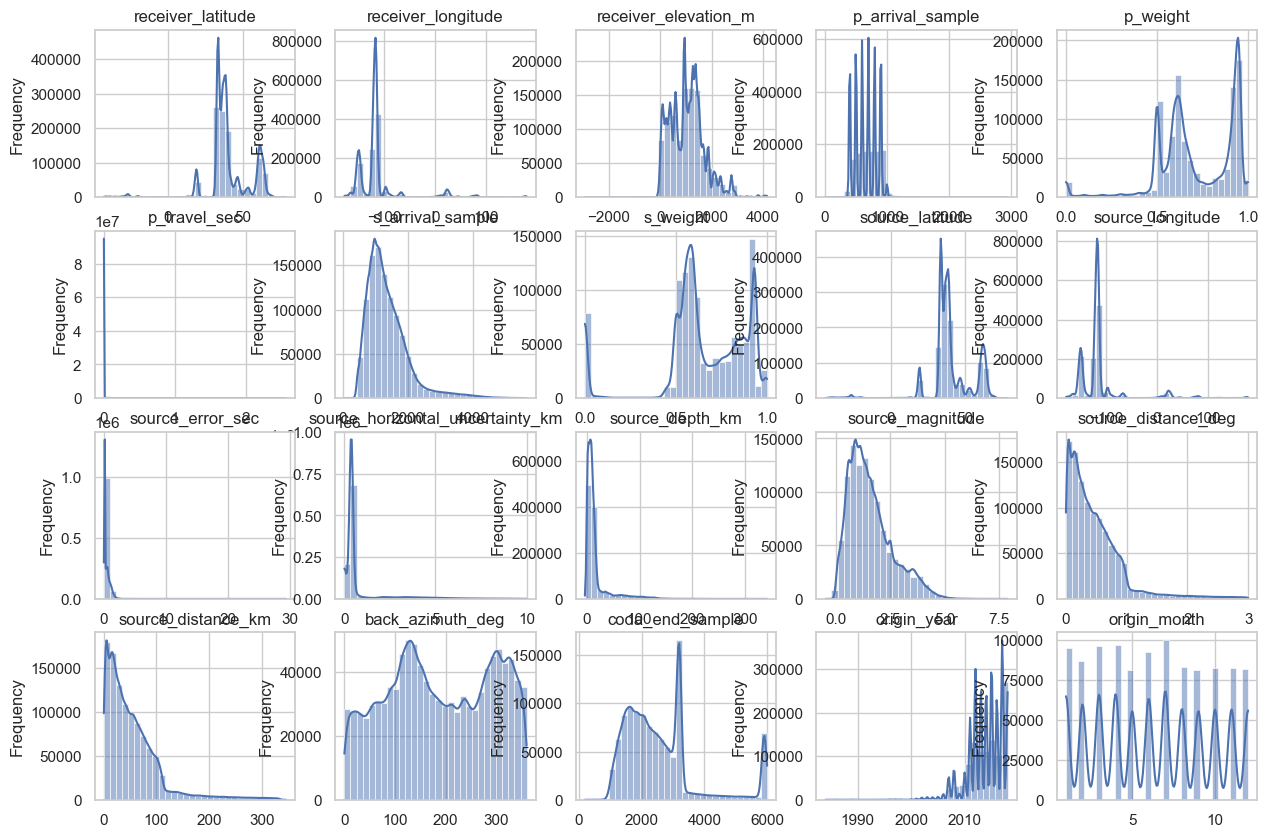

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Create histograms for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 5, i + 1)  # Adjust the grid size as needed
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [17]:

data.to_csv('steaddd.csv', index=False)

In [19]:
print(data.columns)


Index(['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m',
       'p_arrival_sample', 'p_status', 'p_weight', 'p_travel_sec',
       's_arrival_sample', 's_status', 's_weight', 'source_id',
       'source_latitude', 'source_longitude', 'source_error_sec',
       'source_horizontal_uncertainty_km', 'source_depth_km',
       'source_magnitude', 'source_distance_deg', 'source_distance_km',
       'back_azimuth_deg', 'snr_db', 'coda_end_sample', 'origin_year',
       'origin_month', 'origin_day', 'origin_hour', 'origin_minute',
       'trace_start_year', 'trace_start_month', 'trace_start_day',
       'trace_start_hour', 'trace_start_minute'],
      dtype='object')


In [24]:


# Step 2: Drop rows where 'origin_year' is before 2015
data = data[data['origin_year'] > 2015]

# Optional: Reset index after filtering
data.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_earthquake_data_after_2015.csv', index=False)


In [25]:
# Drop the unwanted columns
columns_to_drop = ['origin_month', 'origin_day', 'origin_hour', 'origin_minute']
data_cleaned = data.drop(columns=columns_to_drop)

In [26]:
data.head()


,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,s_arrival_sample,s_status,s_weight,...,origin_year,origin_month,origin_day,origin_hour,origin_minute,trace_start_year,trace_start_month,trace_start_day,trace_start_hour,trace_start_minute
0,32.6368,-89.0573,161.0,500.0,manual,0.59,18.05,1897.0,manual,0.59,...,2016,2,4,1,33,2016,2,4,1,33
1,32.6686,-84.7188,214.0,400.0,manual,0.76,17.29,1635.0,manual,0.68,...,2018,6,23,13,55,2018,6,23,13,55
2,32.6131,-83.1066,111.0,1000.0,manual,0.05,12.03,1858.0,manual,0.22,...,2017,4,6,1,49,2017,4,6,1,49
3,32.6131,-83.1066,111.0,800.0,manual,0.70,6.56,1265.0,manual,0.70,...,2017,6,11,4,43,2017,6,11,4,43
4,32.6131,-83.1066,111.0,400.0,manual,0.69,11.20,1198.0,manual,0.78,...,2018,6,23,13,55,2018,6,23,13,55


In [2]:
import pandas as pd

# Load the dataset
file_path = 'cleaned_earthquake_data_after_2015.csv'
data = pd.read_csv(file_path)

# Drop the unwanted columns
columns_to_drop = ['origin_month', 'origin_day', 'origin_hour', 'origin_minute']
data_cleaned = data.drop(columns=columns_to_drop)

# Optionally, save the cleaned dataset to a new file
data_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Preview the changes
print(data_cleaned.head())


   receiver_latitude  receiver_longitude  receiver_elevation_m  \
0            32.6368            -89.0573                 161.0   
1            32.6686            -84.7188                 214.0   
2            32.6131            -83.1066                 111.0   
3            32.6131            -83.1066                 111.0   
4            32.6131            -83.1066                 111.0   

   p_arrival_sample p_status  p_weight  p_travel_sec  s_arrival_sample  \
0             500.0   manual      0.59         18.05            1897.0   
1             400.0   manual      0.76         17.29            1635.0   
2            1000.0   manual      0.05         12.03            1858.0   
3             800.0   manual      0.70          6.56            1265.0   
4             400.0   manual      0.69         11.20            1198.0   

  s_status  s_weight  ... source_distance_km  back_azimuth_deg  \
0   manual      0.59  ...             103.73              71.8   
1   manual      0.68  ... 

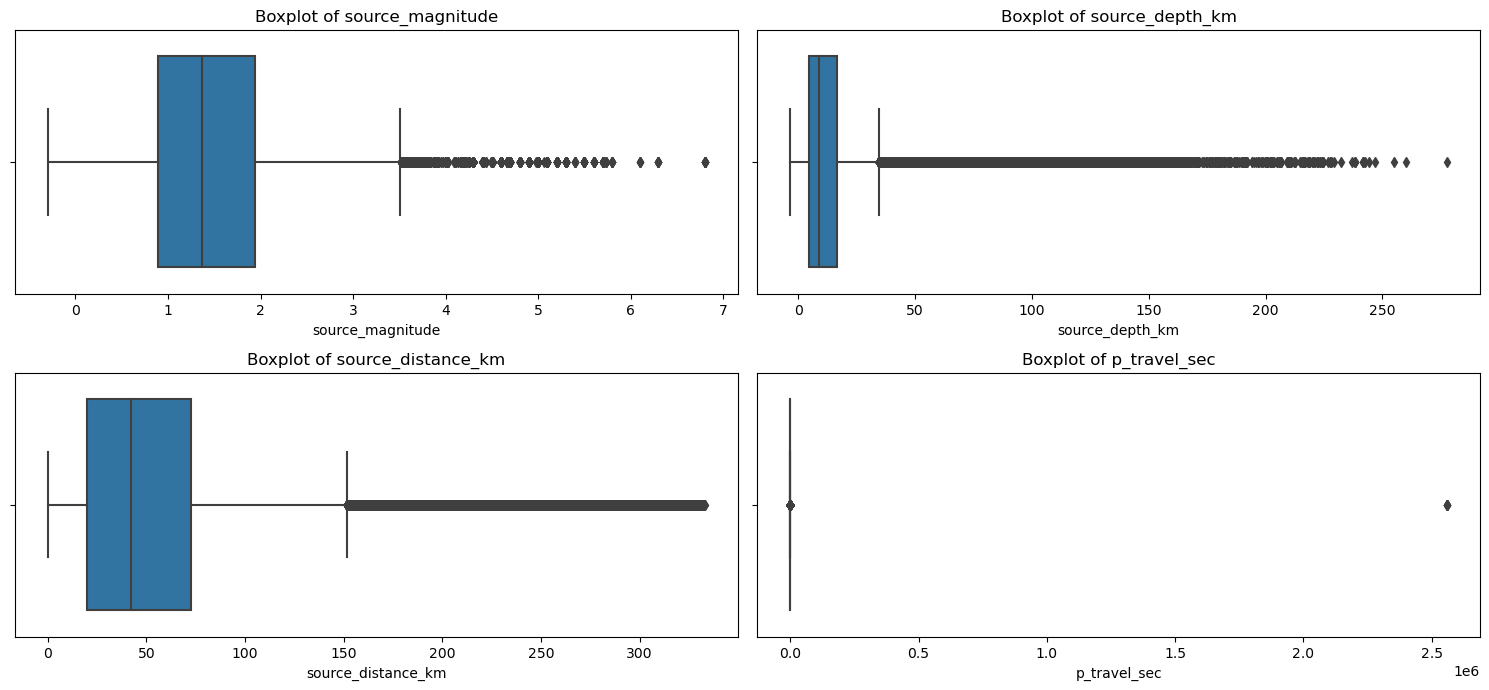

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns where you want to check for outliers
numeric_columns = ['source_magnitude', 'source_depth_km', 'source_distance_km', 'p_travel_sec']

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data_cleaned[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [5]:
from scipy import stats
import numpy as np

# Compute Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(data_cleaned[numeric_columns]))

# Filter rows with Z-score greater than 3 (typically considered outliers)
outliers = data_cleaned[(z_scores > 3).any(axis=1)]

# Display outliers
print(outliers)


        receiver_latitude  receiver_longitude  receiver_elevation_m  \
28             -28.204600          -71.073900                 249.0   
29             -28.204600          -71.073900                 249.0   
30             -28.204600          -71.073900                 249.0   
31             -28.836377          -70.273777                1227.0   
33              43.384300          -73.667800                 340.0   
...                   ...                 ...                   ...   
368063          42.433900         -118.636700                1344.0   
368409          60.358300         -141.751000                2125.0   
368983          38.985199         -119.240601                1857.0   
368984          38.985199         -119.240601                1857.0   
368993          38.985199         -119.240601                1857.0   

        p_arrival_sample p_status  p_weight  p_travel_sec  s_arrival_sample  \
28                 700.0   manual      0.45       16.9000           

In [6]:
import pandas as pd

# Load the dataset
file_path = 'cleaned_earthquake_data_after_2015.csv'
data = pd.read_csv(file_path)

# Set thresholds for outlier removal (you can adjust these based on what you consider extreme)
thresholds = {
    'source_magnitude': 5,    # Removing rows where magnitude is above 5
    'source_depth_km': 200,   # Removing rows where depth is above 200 km
    'source_distance_km': 250, # Removing rows where distance is above 250 km
    'p_travel_sec': 1e6       # Removing rows where p_travel_sec is above 1,000,000 seconds
}

# Apply filters to remove outliers
filtered_data = data[
    (data['source_magnitude'] <= thresholds['source_magnitude']) &
    (data['source_depth_km'] <= thresholds['source_depth_km']) &
    (data['source_distance_km'] <= thresholds['source_distance_km']) &
    (data['p_travel_sec'] <= thresholds['p_travel_sec'])
]





In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373388 entries, 0 to 373387
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   receiver_latitude                 373388 non-null  float64
 1   receiver_longitude                373388 non-null  float64
 2   receiver_elevation_m              373388 non-null  float64
 3   p_arrival_sample                  373388 non-null  float64
 4   p_status                          373388 non-null  object 
 5   p_weight                          373388 non-null  float64
 6   p_travel_sec                      373388 non-null  float64
 7   s_arrival_sample                  373388 non-null  float64
 8   s_status                          373388 non-null  object 
 9   s_weight                          373388 non-null  float64
 10  source_id                         373388 non-null  object 
 11  source_latitude                   373388 non-null  f

In [8]:
# Save the filtered data to a new CSV file
filtered_file_path = 'filtered_earthquake_data.csv'
filtered_data.to_csv(filtered_file_path, index=False)


In [1]:
!pip install nbconvert[webpdf]

     -------------------------------------- 83.4/83.4 kB 391.1 kB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 2.9 MB/s eta 0:00:00


In [2]:
sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

SyntaxError: invalid syntax (1795584982.py, line 1)